In [61]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [62]:
%cd ~/hdstats

/home/251/dxr251/hdstats


In [63]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import hdstats

from mpl_toolkits.mplot3d import axes3d

In [64]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%config InlineBackend.figure_format = 'svg'

np.set_printoptions(precision=4, suppress=True, linewidth=120)
plt.style.use('./docs/hdstats.mplstyle')

In [65]:
containers = pd.read_table('./data/container.txt')
bottles = pd.read_table('./data/bottle.txt')
s2ts = pd.read_table('./data/s2ts.txt', index_col=0, sep=' ', header=None)

## Example multivariate data

### Containers dataset

In [66]:
df = containers
dimnames = df.columns.tolist()
print(dimnames)

['gp', 'Ti', 'Al', 'Fe', 'Mn', 'Mg', 'Ca', 'Ba', 'Sr', 'Zr']


In [67]:
X = df.values

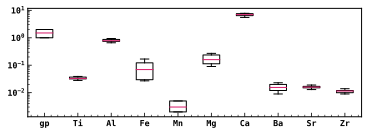

In [68]:
plt.figure(figsize=(6,2))
ax = plt.gca()
plt.boxplot(X)
ax.set_yscale('log')
ax.set_xticklabels(dimnames);

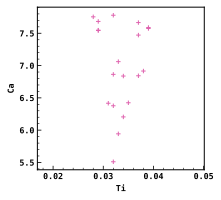

In [69]:
plt.figure(figsize=(3,3))
plt.scatter(X[:,1], X[:,6], marker='+', s=20);
plt.xlabel(dimnames[1])
plt.ylabel(dimnames[6]);

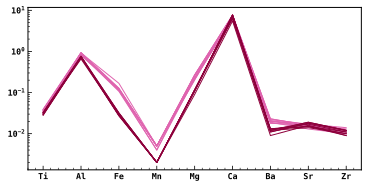

In [70]:
X = df[df.gp == 1].drop('gp', 1).values
Y = df[df.gp == 2].drop('gp', 1).values

plt.figure(figsize=(6,3))
ax = plt.gca()
styler = plt.rcParams['axes.prop_cycle'].by_key()['color']
for ds, style in zip([X,Y], styler[::2]):
    for xx in ds:
        ax.plot(xx, color=style)
ax.set_xticklabels(range(X.shape[1]))
ax.set_xticklabels(dimnames)
ax.set_yscale('log');

### Bottle dataset

In [71]:
df = bottles
dimnames = df.columns.tolist()
print(dimnames)

['Number', 'Mn', 'Ba', 'Sr', 'Zr', 'Ti']


In [72]:
X = df.values

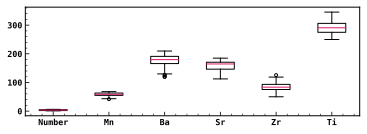

In [73]:
plt.figure(figsize=(6,2))
ax = plt.gca()
plt.boxplot(X)
ax.set_xticklabels(dimnames);

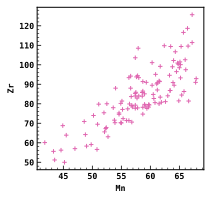

In [74]:
plt.figure(figsize=(3,3))
plt.scatter(X[:,1], X[:,4], marker='+', s=20);
plt.xlabel(dimnames[1])
plt.ylabel(dimnames[4]);

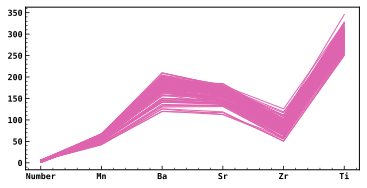

In [75]:
plt.figure(figsize=(6,3))
ax = plt.gca()
style = plt.rcParams['axes.prop_cycle'].by_key()['color'][0]
for xx in X:
    ax.plot(xx, color=style)
ax.set_xticks(range(6))
ax.set_xticklabels(dimnames);

### Sentinel-2 time series

In [76]:
dimnames = list(s2ts.index)
X = s2ts.values

In [77]:
gX=X[:,np.isfinite(X).all(axis=0)]

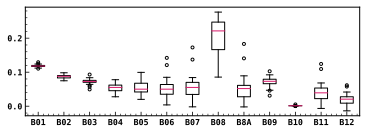

In [78]:
plt.figure(figsize=(6,2))
ax = plt.gca()
plt.boxplot(gX.T)
ax.set_xticklabels(dimnames);

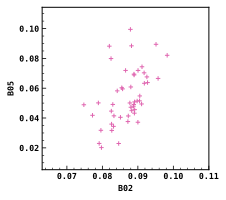

In [79]:
plt.figure(figsize=(3,3))
plt.scatter(gX[1,:], gX[4,:], marker='+', s=20);
plt.xlabel(dimnames[1])
plt.ylabel(dimnames[4]);

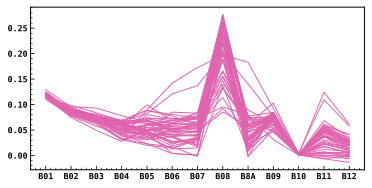

In [80]:
plt.figure(figsize=(6,3))
ax = plt.gca()
style = plt.rcParams['axes.prop_cycle'].by_key()['color'][0]
for xx in X.T:
    ax.plot(xx, color=style)
ax.set_xticks(range(X.shape[0]))
ax.set_xticklabels(dimnames);

## Various statistics

In [81]:
dimnames = list(s2ts.index)
X = s2ts.values
n =20

In [82]:
gX=X[:,np.isfinite(X).all(axis=0)]

In [83]:
mu = np.nanmean(gX[:,:n], axis=1)

In [84]:
mm = hdstats.nangeomedian(X[:,:n], axis=1)

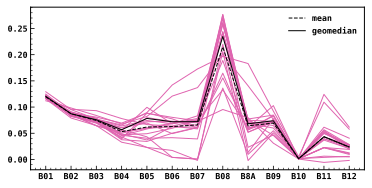

In [85]:
plt.figure(figsize=(6,3))
ax = plt.gca()
style = plt.rcParams['axes.prop_cycle'].by_key()['color']
for xx in gX[:,:n].T:
    ax.plot(xx, color=style[0])
ax.plot(mu, color='k', linestyle='--', label='mean')
ax.plot(mm, color='k', label='geomedian')
ax.set_xticks(range(X.shape[0]))
ax.set_xticklabels(dimnames);
plt.legend()

In [86]:
S = np.cov(gX)
print(S)

[[ 0.      0.      0.      0.      0.      0.      0.     -0.      0.     -0.      0.      0.      0.    ]
 [ 0.      0.      0.      0.0001  0.      0.      0.     -0.0001  0.      0.      0.      0.0001  0.    ]
 [ 0.      0.      0.      0.0001  0.0001  0.      0.      0.0001  0.      0.      0.      0.0001  0.    ]
 [ 0.      0.0001  0.0001  0.0001  0.0001  0.0001  0.0001 -0.0002  0.0001  0.0001  0.      0.0002  0.0001]
 [ 0.      0.      0.0001  0.0001  0.0003  0.0004  0.0004 -0.0001  0.0004  0.      0.      0.0003  0.0002]
 [ 0.      0.      0.      0.0001  0.0004  0.0007  0.0008 -0.0001  0.0008  0.      0.      0.0005  0.0003]
 [ 0.      0.      0.      0.0001  0.0004  0.0008  0.001  -0.0001  0.001   0.0001  0.      0.0006  0.0003]
 [-0.     -0.0001  0.0001 -0.0002 -0.0001 -0.0001 -0.0001  0.0028 -0.0002  0.0002 -0.     -0.0004 -0.0002]
 [ 0.      0.      0.      0.0001  0.0004  0.0008  0.001  -0.0002  0.0011  0.      0.      0.0006  0.0003]
 [-0.      0.      0.      0.0001  0.

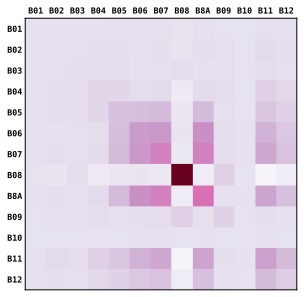

In [87]:
plt.figure(figsize=(5,5))
plt.imshow(S)
ax = plt.gca()
ax.set_xticks(range(X.shape[0]))
ax.set_xticklabels(dimnames)
ax.set_yticks(range(X.shape[0]))
ax.set_yticklabels(dimnames);
plt.tick_params(axis='both', which='both', length=0, labelbottom=False, labeltop=True, labelleft=True)

In [88]:
R = np.corrcoef(gX)
print(R)

[[ 1.      0.4125  0.3173  0.37    0.6025  0.3421  0.3596 -0.0544  0.3483 -0.0359  0.4682  0.3017  0.4256]
 [ 0.4125  1.      0.798   0.9142  0.4839  0.2438  0.3073 -0.2041  0.2688  0.3033  0.3511  0.6684  0.6745]
 [ 0.3173  0.798   1.      0.7531  0.4342  0.1503  0.1802  0.1732  0.118   0.3772  0.1999  0.3402  0.3103]
 [ 0.37    0.9142  0.7531  1.      0.541   0.1847  0.2249 -0.2649  0.1708  0.3567  0.2532  0.6079  0.6129]
 [ 0.6025  0.4839  0.4342  0.541   1.      0.7266  0.6958 -0.0905  0.6441  0.1292  0.2848  0.5938  0.6159]
 [ 0.3421  0.2438  0.1503  0.1847  0.7266  1.      0.9391 -0.0362  0.9372  0.1188  0.4051  0.7062  0.6676]
 [ 0.3596  0.3073  0.1802  0.2249  0.6958  0.9391  1.     -0.079   0.9347  0.1607  0.4509  0.7371  0.6733]
 [-0.0544 -0.2041  0.1732 -0.2649 -0.0905 -0.0362 -0.079   1.     -0.1274  0.2661 -0.0284 -0.2739 -0.2801]
 [ 0.3483  0.2688  0.118   0.1708  0.6441  0.9372  0.9347 -0.1274  1.      0.0631  0.4777  0.7261  0.6753]
 [-0.0359  0.3033  0.3772  0.3567  0.

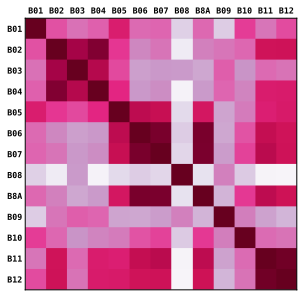

In [89]:
plt.figure(figsize=(5,5))
plt.imshow(R)
ax = plt.gca()
ax.set_xticks(range(X.shape[0]))
ax.set_xticklabels(dimnames)
ax.set_yticks(range(X.shape[0]))
ax.set_yticklabels(dimnames);
plt.tick_params(axis='both', which='both', length=0, labelbottom=False, labeltop=True, labelleft=True)

## Generalised variance

In [90]:
GV = hdstats.gv(gX)
print(GV)

3.997992977180856e-58


In [91]:
print(hdstats.gv(gX, log=True))

-132.16414291416106


In [92]:
logGV = np.log(GV)
print(logGV)

-132.16414291416106


## Multivariate normals

In [93]:
mu = np.array([0,0])
Sigma = np.eye(2)
mn = hdstats.MultivariateNormal(mean=mu, cov=Sigma)

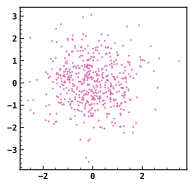

In [94]:
X = mn.rvs(500).T

plt.figure(figsize=(3,3))
plt.scatter(X[0,:], X[1,:], s=2);

<a list of 10 text.Text objects>

/g/data/v10/public/modules/dea-env/20190208/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/g/data/v10/public/modules/dea-env/20190208/lib/python3.6/site-packages/matplotlib/font_manager.py:1250: UserWarning: findfont: Could not match :family=DejaVu Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=6.0. Returning /usr/share/fonts/dejavu/DejaVuSansMono-Bold.ttf.
  UserWarning)


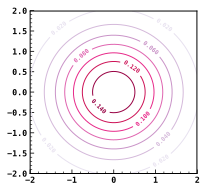

In [95]:
x, y = np.mgrid[-2:2:.01, -2:2:.01]
pos = np.dstack((x, y))
z = mn.pdf(pos)

fig = plt.figure(figsize=(3,3))
cs = plt.contour(x, y, z);
plt.clabel(cs, inline=1, fontsize=6)

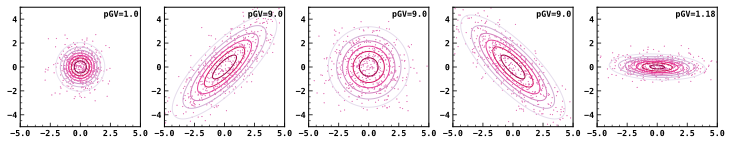

In [96]:
mu = np.array([0,0])
Sigmas = [
    np.eye(2),
    np.array([[5,4],[4,5]]),
    np.array([[3,0],[0,3]]),
    np.array([[5,-4],[-4,5]]),
    np.array([[4,-0.15],[-0.15,0.3]])
]

fig, axes = plt.subplots(1, len(Sigmas), figsize=(2.5*len(Sigmas), 2.2))

for i, Sigma in enumerate(Sigmas):
    mn = hdstats.MultivariateNormal(mean=mu, cov=Sigma)
    x, y = np.mgrid[-5:5:.02, -5:5:.02]
    pos = np.dstack((x, y))
    z = mn.pdf(pos)
    X = mn.rvs(500).T
    GV = np.linalg.det(Sigma)
    axes[i].contour(x, y, z)
    axes[i].scatter(X[0,:], X[1,:])
    axes[i].set_xlim((-5,5))
    axes[i].set_ylim((-5,5))
    axes[i].text(4.85, 4.2, f'pGV={GV:.3}', horizontalalignment='right', size='small')

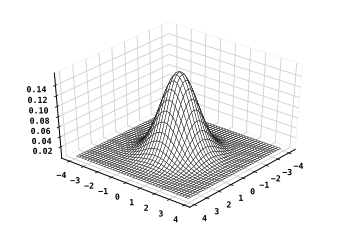

In [97]:
X = np.arange(-4, 4, 0.2)
Y = np.arange(-4, 4, 0.2)
X, Y = np.meshgrid(X, Y)

pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y

mu = np.array([0,0])
Sigma = np.eye(2)
mn = hdstats.MultivariateNormal(mean=mu, cov=Sigma)
Z = mn.pdf(pos)

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, color='white', shade=False)
#ax.plot_wireframe(X, Y, Z)

ax.grid(True)
ax.xaxis.pane.set_edgecolor(plt.rcParams['grid.color'])
ax.yaxis.pane.set_edgecolor(plt.rcParams['grid.color'])
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax.view_init(elev=40, azim=40)
ax.dist=11

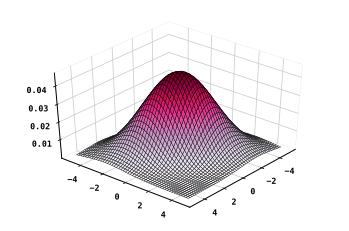

In [98]:
X = np.arange(-5, 5, 0.2)
Y = np.arange(-5, 5, 0.2)
X, Y = np.meshgrid(X, Y)

pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y

mu = np.array([0,0])
Sigma = np.array([[4,-2],[-2,4]])
mn = hdstats.MultivariateNormal(mean=mu, cov=Sigma)
Z = mn.pdf(pos)

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.rcParams['image.cmap'])

ax.grid(True)
ax.xaxis.pane.set_edgecolor(plt.rcParams['grid.color'])
ax.yaxis.pane.set_edgecolor(plt.rcParams['grid.color'])
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax.view_init(elev=40, azim=40)
ax.dist=11

## Sample covariances

In [99]:
n, p = 500, 2

In [100]:
mu = np.zeros(p)
Sigma = np.eye(p)
mn = hdstats.MultivariateNormal(mean=mu, cov=Sigma)

In [101]:
X = mn.rvs(500).T

In [102]:
X.shape

(2, 500)

The (population) covariance is $\Sigma$.

In [103]:
Sigma

array([[1., 0.],
       [0., 1.]])

We estimate the sample covariance from the data.

In [104]:
np.cov(X)

array([[ 0.9288, -0.0039],
       [-0.0039,  0.925 ]])

Another way to estimate the sample covariance.

In [105]:
np.matmul(X,X.T)/n

array([[ 0.9314, -0.001 ],
       [-0.001 ,  0.925 ]])

Generate the sample correlation matrix $R_{ij} = \frac{ C_{ij} } { \sqrt{ C_{ii} * C_{jj} } }$

In [106]:
np.corrcoef(X)

array([[ 1.    , -0.0042],
       [-0.0042,  1.    ]])